In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.shape

(1000, 3)

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
820,6.27,16,0
724,7.95,21,0
699,6.64,20,0
679,6.70,35,0
222,6.97,78,0


C:\Users\hembr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hembr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hembr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

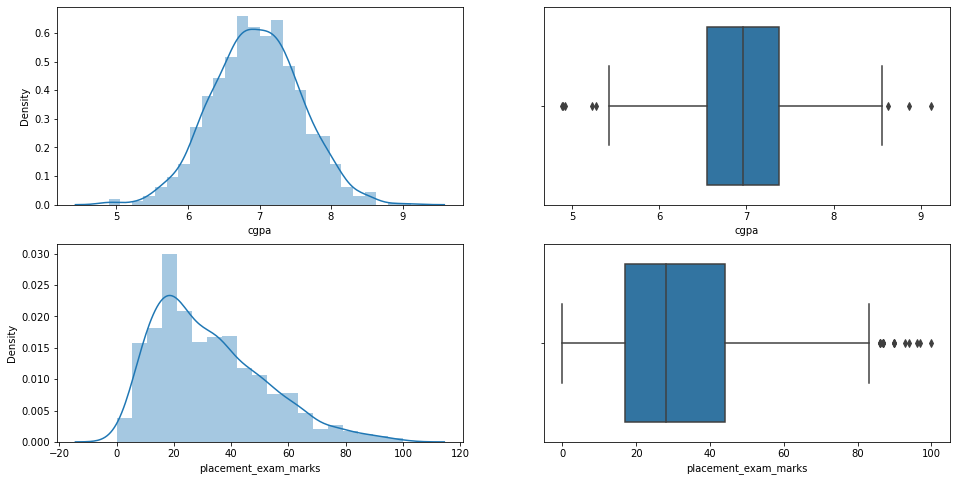

In [5]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['cgpa'])

plt.subplot(2,2,2)
sns.boxplot(df['cgpa'])

plt.subplot(2,2,3)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(df['placement_exam_marks'])

plt.show()

# Outlier Detection

In [6]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124000000001
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [7]:
# Finding the boundary values

print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397177
Lowest allowed 5.113546374602842


In [8]:
# Finding the outliers

df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44,1
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
999,4.90,10,1


# Outlier Treatment

# Trimming

In [9]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]          # removing the outlier rows
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
991,7.04,57,0
992,6.26,12,0
993,6.73,21,1
994,6.48,63,0


C:\Users\hembr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hembr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hembr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

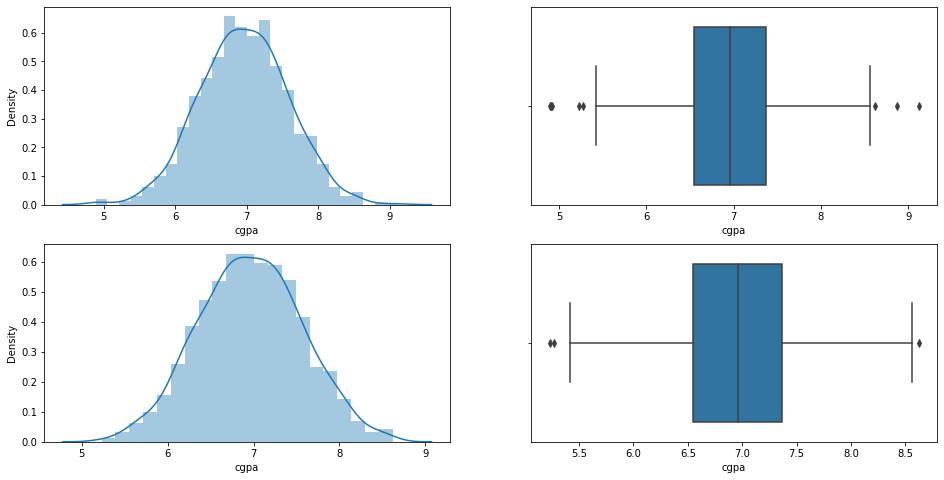

In [10]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['cgpa'])

plt.subplot(2,2,2)
sns.boxplot(df['cgpa'])

plt.subplot(2,2,3)
sns.distplot(new_df['cgpa'])

plt.subplot(2,2,4)
sns.boxplot(new_df['cgpa'])

plt.show()

# Capping

In [11]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [12]:
new_df_cap = df.copy()

new_df_cap['cgpa'] = np.where(                             # replacing the outliers below lower limit with the lower limit value
    df['cgpa']>upper_limit,                        # and outliers above upper limit with upper limit value
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,                          # Syntax of np.where ->  (condition; statement if true; statement if false)
        df['cgpa']
    )
)

In [13]:
new_df_cap['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

C:\Users\hembr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hembr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hembr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

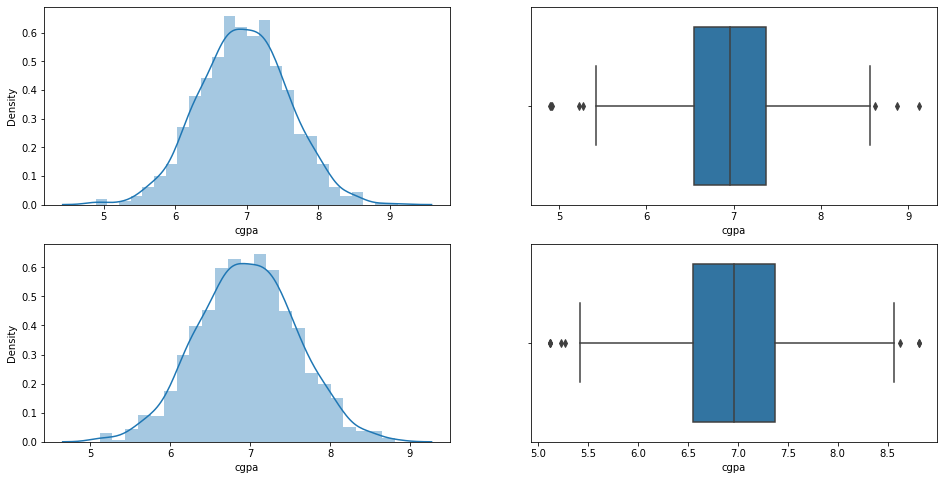

In [14]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['cgpa'])

plt.subplot(2,2,2)
sns.boxplot(df['cgpa'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['cgpa'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['cgpa'])

plt.show()